# 深層学習後編 (day4): 実装演習

本書は、「深層学習後編（day4）レポート」の、実装演習についてのものです。


## 4_1_tensorflow_codes.ipynb ( TensolFlow )


### キャプチャ

自身の環境において、最終コードセル[22]までの実行を確認した。

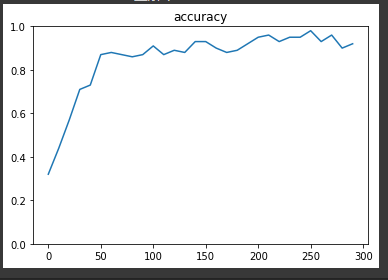

### 内容

実装演習の際、確認した内容を記録する。


コードセル[1] の前に、以下の設定を行って、実行した。

- [The %tensorflow_version magic - Colaboratory](https://colab.research.google.com/notebooks/tensorflow_version.ipynb#scrollTo=NeWVBhf1VxlH)

```python
%tensorflow_version 1.x
```


- NOTE: [Difference Between Tensors and Arrays](https://thecleverprogrammer.com/2021/03/19/difference-between-tensors-and-arrays/#:~:text=implementation%20using%20Python.-,Difference%20Between%20Tensors%20and%20Arrays,memory%20like%20GPU%20and%20they%20are%20immutable%2C%20unlike%20NumPy%20arrays.,-Tensors%20and%20Arrays)


In [ ]:
import numpy as np
import tensorflow as tf
array = np.ones([3, 3])
print(array)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
tensor = tf.multiply(array, 10)
print(tensor)

tf.Tensor(
[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]], shape=(3, 3), dtype=float64)


#### 線形回帰

- [try]

- 変更前の結果

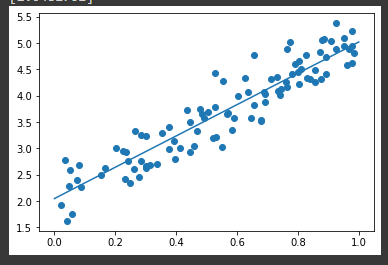

- ノイズを変更

```python
# ノイズを加える
# noise = 0.3
noise = 0.3 * 2.0
d = d + noise * np.random.randn(n) 
```

それほど変わらない結果を得た。<br/>
ノイズが 2 倍になっても平均誤差 ( 距離 ) が大きくなるが、その誤差を少なくする学習の過程は同じものと考えられる。


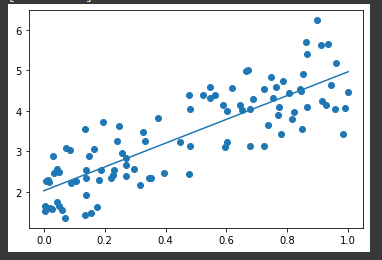

- d を変更

```python
# データを生成
n = 100
x = np.random.rand(n)
# d = 3 * x + 2
d = -2 * x + 5
```


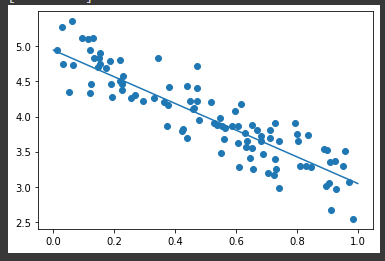

#### 非線形回帰


- noiseの値を変更

- 変更前


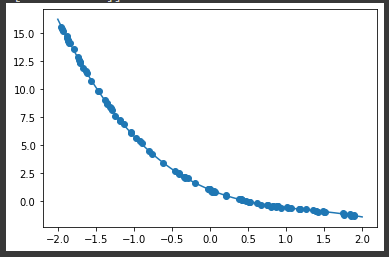

- 変更後

```python
#  ノイズを加える
# noise = 0.05
noise = 0.05 * 2
d = d + noise * np.random.randn(n) 
```


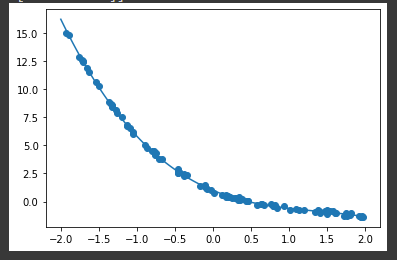

- dの数値を変更

次の節の、以下の式を使用。

$$
y=30x^{2} +0.5x+0.2
$$

```python
# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
# d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d =  30 * x ** 2 + 0.5 * x + 0.2
```


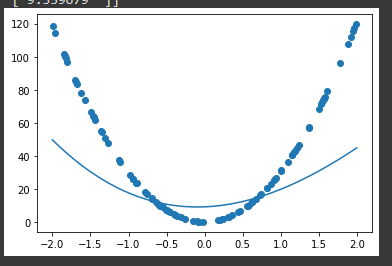

#### 非線形回帰 ( [try] )


-  次の式をモデルとして回帰
$$ y=30x^{2} +0.5x+0.2 $$

非線形回帰の 2 つ目の try として実行。 ( 上述 )

- 誤差が収束するようiters_numやlearning_rateを調整


```python
# iters_num = 10000
iters_num = 10000 * 2
```


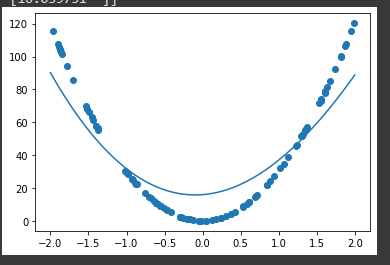

上記と合わせて、以下を変更。

```python
# optimizer = tf.train.AdamOptimizer(0.001)
learning_rate = 0.001 * 2
optimizer = tf.train.AdamOptimizer(learning_rate)
```


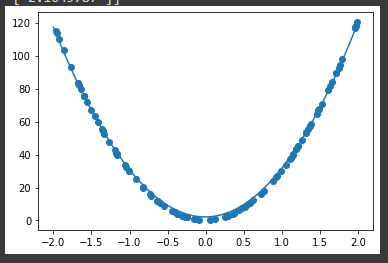

#### 分類1層 (mnist)

- [try]

- 参考: [tensorflow-1/index.md at master · happycube/tensorflow-1 · GitHub](https://github.com/happycube/tensorflow-1/blob/master/tensorflow/g3doc/tutorials/mnist/pros/index.md)

```python
# -------------- ここを補填 ------------------------
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
# ------------------------------------------------------

```


- 結果

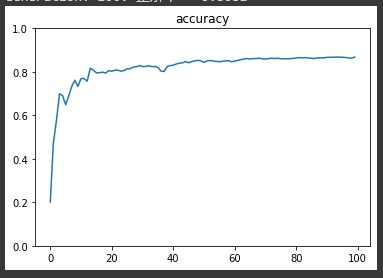

#### 分類3層 (mnist)

- 隠れ層のサイズを変更

- 変更前


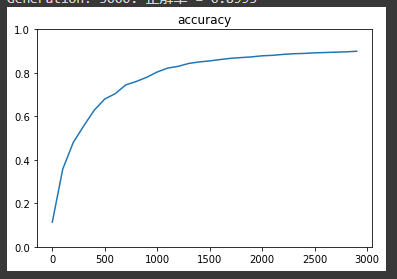

```python
# hidden_layer_size_1 = 600
# hidden_layer_size_2 = 300
hidden_layer_size_1 = 800
hidden_layer_size_2 = 400
```

大きな変化は見られなかった。


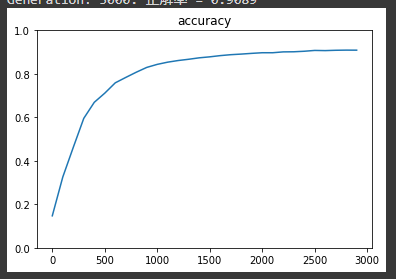

```python
# optimizer = tf.train.AdamOptimizer(1e-4)
learning_rate = 0.1
momentum = 0.1
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
```

やはり、 Adam の方が効率が良い。


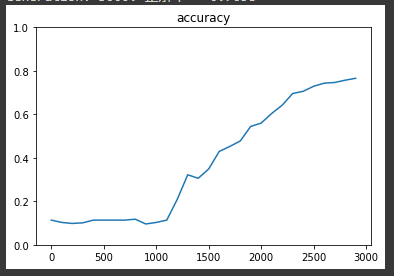

#### 分類CNN (mnist)

- 変更前


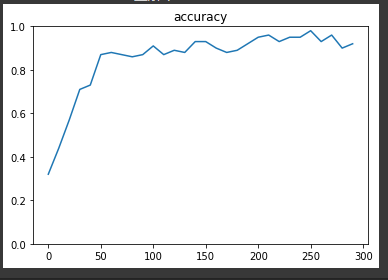

```python
# dropout_rate = 0.5
dropout_rate = 1.0

...

for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
```
設定時に、 1 - 1 でドロップアウトを 0 に。

ドロップアウトの効果があったことを意味する。


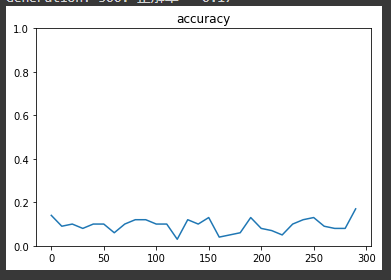

## 4_2_save_loa/4_2_save.py, 4_2_load.py - モデルの保存と復元

Google Colaboratory で実行した。

実行準備と結果 ( キャプチャ )、確認内容は以下の通り。


### 実行準備

Google Colaboratory のノートに作成した。

以下の構成でノートにソースコードを準備した。

- TensorFlow Version 1 の使用を指定
```python
%tensorflow_version 1.x
```

- 4_2_save.py のソースコード

- 4_2_load.py のソースコード


### 4_2_save.py

モデルを保存する。

以下が出力される。

```
Generation: 10. 誤差 = 0.11011822
Generation: 20. 誤差 = 0.08167344
Generation: 30. 誤差 = 0.075721
Generation: 40. 誤差 = 0.07447538
Generation: 50. 誤差 = 0.07421472
Generation: 60. 誤差 = 0.074160166
Generation: 70. 誤差 = 0.07414875
Generation: 80. 誤差 = 0.07414636
Generation: 90. 誤差 = 0.07414585
Generation: 100. 誤差 = 0.07414575
W: [2.9136019]
b: [2.0726504]
```


### 4_2_load.py

```
INFO:tensorflow:Restoring parameters from model/test_model
Restored a model
[2.4450874 3.9454117 2.7291558 3.339045  3.533158  3.7357721 4.5635905
 2.8984637 4.0027795 4.6535106 4.60229   4.2181726 3.939871  2.4199479
 3.168971  2.9461763 3.3675666 3.4041874 3.7396505 3.298481  2.7915866
 3.2523746 4.2978783 3.465951  4.633156  2.302922  2.8405128 2.665512
 4.416861  3.8534212 4.121068  4.5087137 3.8440862 2.3960602 4.7834873
 2.7371035 3.345479  2.9278994 3.8506508 3.9420257 3.7492776 4.2667475
 4.462488  3.2401423 4.5498123 2.3437247 2.2286522 3.136644  4.710823
 4.4366083 2.5575218 2.6910973 4.786645  2.1165133 4.754759  4.175661
 3.025278  4.499283  2.4343588 4.7174387 3.829265  3.639254  3.8792722
 3.0179405 2.511583  4.923765  3.1109338 4.509151  2.9280727 2.389603
 2.7984972 4.191244  3.623084  2.3663368 4.7755766 2.4752967 3.953322
 3.7615242 3.5767117 4.774283  4.346059  2.680699  2.2137856 3.768608
 3.903613  4.0312743 2.2710419 3.1939178 2.1651993 2.4979317 4.0235324
 4.75431   2.535497  4.227008  4.4902773 2.9302769 2.470584  4.014741
 3.5806224 2.4028833]
loss_val 0.09918089
W: [2.9136019]
b: [2.0726504]
```

モデルが復元できた。

W, b が保存時と同じ値であることを確認。



## 4_3_keras_codes.ipynb




### キャプチャ

自身の環境において、最終コードセル[8]までの実行を確認した。

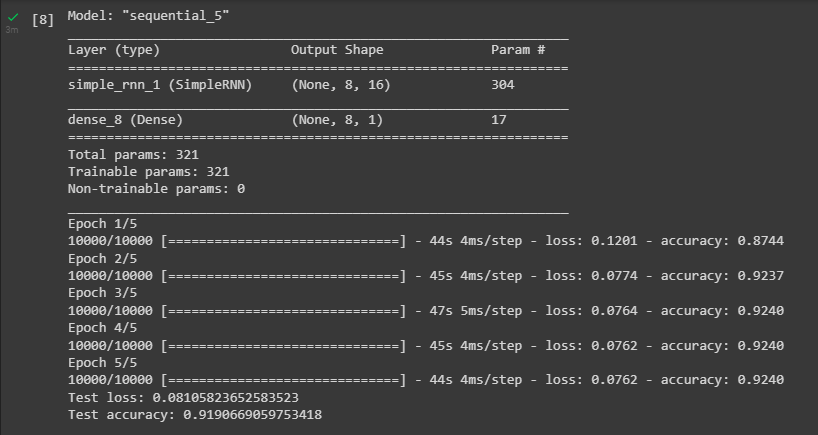

### 内容

実装演習の際、確認した内容を記録する。


#### 実行上の変更点

`%tensorflow_version 1.x` を設定。


`keras.callbacks.callbacks.History instance` の変更点に対応。

以下は、 "分類 (iris)" の場合。

```python
#Accuracy
# plt.plot(history.history['acc'])
plt.plot(history.history['accuracy'])

# plt.plot(history.history['val_acc'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
...
plt.show()
```


#### 線形回帰


TensolFlow 版に比べて、少ない実装量。

#### 単純パーセプトロン


- 変更前

OR 回路の訓練データである。

```python
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
```

```
...
Epoch 30/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2794
TEST
[[ True]
 [ True]
 [ True]
 [ True]]
```


```python
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
# OR 回路
# T = np.array( [[0], [1], [1], [1]] )
# AND 回路
T = np.array( [[0], [0], [0], [1]] )
```

```
Epoch 30/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4175
TEST
[[ True]
 [ True]
 [ True]
 [ True]]
```


```python
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
...
# XOR 回路
T = np.array( [[0], [1], [1], [0]] )
```

```
Epoch 30/30
4/4 [==============================] - 0s 6ms/step - loss: 0.7240
TEST
[[ True]
 [False]
 [ True]
 [False]]
```


"XOR 回路" で、
learning_rate, epochs, batch_size 
を調整したが、全て True にできなかった。
もしかしたら、単純パーセプトロンでは難しい問題なのか。


```python
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
# OR 回路
T = np.array( [[0], [1], [1], [1]] )
...

# トレーニング
epochs=30
batch_size=10
model.fit(X, T, epochs=epochs, batch_size=batch_size)
```

```
TEST
[[False]
 [ True]
 [ True]
 [ True]]
```

バッチサイズを上げると、
`Number of samples per gradient update.`
なので、勾配の更新度が下がり、学習不足。


```python
# トレーニング
epochs=300
batch_size=10
model.fit(X, T, epochs=epochs, batch_size=batch_size)
```

エポック数を上げて、学習を進めた結果。

```
TEST
[[ True]
 [ True]
 [ True]
 [ True]]
```


#### 分類 (iris)

- 変更前


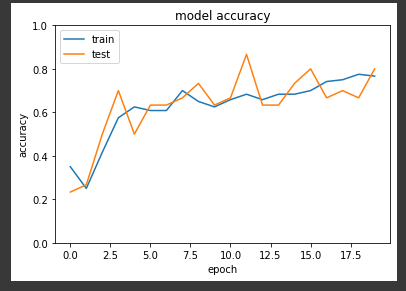

- 中間層の活性関数をsigmoid

```python
#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
# model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()
```


学習の進みが遅くなった。

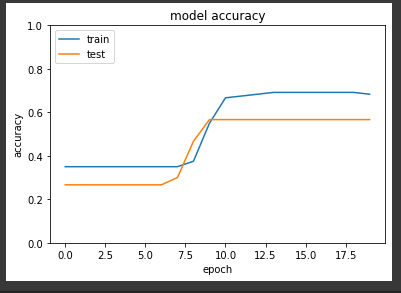

- SGDをimportしoptimizerをSGD(lr=0.1)に変更

```python
#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
# model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```
テストにおいて、変動が大きくなったが、 Sigmoid 活性化関数単体より学習の進行速度が向上。



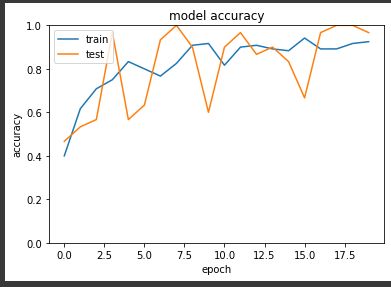

#### CNN分類 (mnist)


epoch 10 あたりで過学習か。


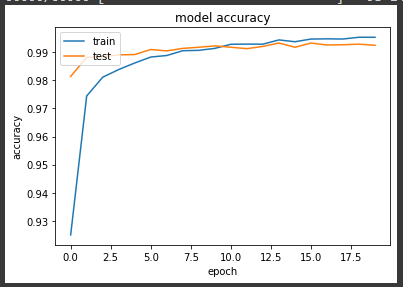

#### cifar10


```python
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))
```

```
[0.6633180787086487, 0.7853000164031982]
```

CNN によって、 8 割近い正確度を達成している。


#### RNN


- 変更前

```
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_26 (Dense)             (None, 8, 1)              17        
=================================================================
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 53s 5ms/step - loss: 0.0982 - accuracy: 0.8824
Epoch 2/5
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 3/5
10000/10000 [==============================] - 53s 5ms/step - loss: 7.9431e-04 - accuracy: 1.0000
Epoch 4/5
10000/10000 [==============================] - 53s 5ms/step - loss: 4.4065e-04 - accuracy: 1.0000
Epoch 5/5
10000/10000 [==============================] - 52s 5ms/step - loss: 2.9826e-04 - accuracy: 1.0000
Test loss: 0.00025707565318351894
Test accuracy: 1.0

check
4m 28s
completed at 6:29 PM
```


- RNNの出力活性化関数を sigmoid に変更

```python
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
```

既に設定済みであった。



- 最適化方法をadamに変更

```python
# model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
```


- RNNの出力ノード数を128


- RNNの出力活性化関数を tanh に変更

```
    activation: Activation function to use
        (see activations).
        Default: hyperbolic tangent (tanh).
```

デフォルト ( 指定なし ) にする。


- RNNの入力 Dropout を0.5に設定

- RNNの再帰 Dropout を0.3に設定

- RNNのunrollをTrueに設定

```
    unroll: Boolean (default False).
        If True, the network will be unrolled,
else a symbolic loop will be used.
Unrolling can speed-up a RNN,
although it tends to be more memory-intensive.
Unrolling is only suitable for short sequences.
```

今回の様な短い時系列の場合、有効であると理解。

上記一式の変更を以下の箇所に適用。

```python
# units = 16
units = 128
model.add(SimpleRNN(units=units,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               # activation='relu',
               dropout=0.5,
               recurrent_dropout=0.3,
               unroll = True,
            ))
```


```
Epoch 5/5
10000/10000 [==============================] - 14s 1ms/step - loss: 0.2395 - accuracy: 0.5765
Test loss: 0.2115856479323975
Test accuracy: 0.6861436367034912
```

精度は低下したが、性能は向上した。
精度と性能はトレードオフの関係にあるということか。
